In [15]:
import matplotlib.pyplot as plt
import numpy as np
import csv
# load feature variables and their names
X = np.loadtxt("hitters.x.csv", delimiter=",", skiprows=1)
with open("hitters.x.csv", "r") as f:
    X_colnames = next(csv.reader(f))
# load salaries
y = np.loadtxt("hitters.y.csv", delimiter=",", skiprows=1)

In [16]:
# Problem 3.1
X_normalized = np.zeros((np.shape(X)[0],np.shape(X)[1]))
for i in range(np.shape(X)[1]):
    std = np.std(X[:,i])
    X_normalized[:,i] = X[:,i] / std

In [17]:
# ridge regression
def ridge(X, y, lb):
    theta = np.linalg.inv(X.T @ X + (lb)*np.identity(np.shape(X)[1])) @ X.T @ y
    return theta

In [18]:
# least square
def LS(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

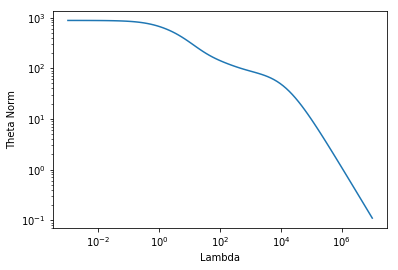

In [19]:
# Problem 3.3
X_new = np.hstack((np.ones((len(X),1)), X_normalized))
division = 100
theta_norm = [0]*division
#theta_temp = np.zeros((np.shape(X_new)[1], division))
log_lambda = 10**np.linspace(-3, 7, division)
for i in range(division):
    theta = ridge(X_new, y, log_lambda[i])
    #theta_temp[:,i] = theta
    theta_norm[i] = np.linalg.norm(theta)
plt.loglog(log_lambda, theta_norm)
plt.xlabel("Lambda")
plt.ylabel("Theta Norm")
plt.show()

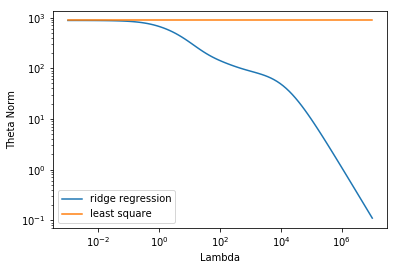

In [20]:
# Problem 3.4
theta_LS = LS(X_new, y)
plt.loglog(log_lambda, theta_norm, label="ridge regression")
plt.loglog(log_lambda, np.linalg.norm(theta_LS)*np.ones((len(theta_norm))), label="least square")
plt.legend()
plt.xlabel("Lambda")
plt.ylabel("Theta Norm")
plt.show()

Minimum lambda :  911.162756115


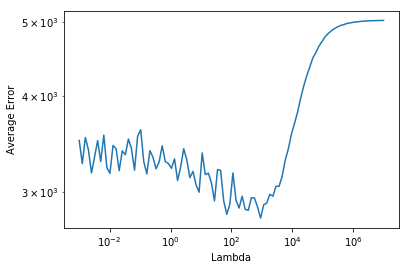

In [21]:
# Problem 3.5
fold = 5
len_sets = int(len(X_new) / fold)
set_col = set(range(len(X_new)))
avg_error = [0]*division
for l in range(division):
    row_suffle = np.arange(len(X_new))
    np.random.shuffle(row_suffle)
    X_shuffle = np.zeros((np.shape(X_new)))
    for j in range(len(X_new)):
        X_shuffle[j,:] = X_new[row_suffle[j],:]
    set_error = [0]*fold
    for i in range(fold):
        if i ==(fold-1):
            cross_vali_list = set(range(i*len_sets, len(X_new)))
            train_list = list(set_col - cross_vali_list)
            X_train = X_shuffle[train_list,:]
            y_train = y[train_list]
        else:
            cross_vali_list = set(range(i*len_sets, (i+1)*len_sets))
            train_list = list(set_col - cross_vali_list)
            X_train = X_shuffle[train_list,:]
            y_train = y[train_list]
        theta = ridge(X_train, y_train, log_lambda[l])
        X_vali = X_new[list(cross_vali_list),:]
        y_vali = y[list(cross_vali_list)]
        set_error[i] = np.linalg.norm(y_vali - X_vali @ theta)
    avg_error[l] = sum(set_error)/len(set_error)
    
min_lambda = log_lambda[list(avg_error).index(min(list(avg_error)))]
print('Minimum lambda : ', min_lambda)
plt.loglog(log_lambda, avg_error)
plt.xlabel("Lambda")
plt.ylabel("Average Error")
plt.show()    

In [22]:
# Problem 3.6
theta_ridge = ridge(X_new ,y ,min_lambda)
theta_ridge = theta_ridge/theta_ridge[0]
print(theta_ridge[1:])
print(list(theta_ridge).index(max(theta_ridge)))

[ 3.9106572   4.57026825  2.26475164  3.97033053  3.77109083  4.28366692
  3.12644855  3.7296013   4.09587647  3.65906005  4.15987695  4.14610762
  3.17275089  1.31034152 -1.78786645  3.88655058  0.55754875  0.43603852
  1.11160396]
2


In [23]:
sorted_theta = sorted(theta_ridge, reverse=True)
priority_theta = []
for i in range(len(sorted_theta)):
    priority_theta.append(list(theta_ridge).index(sorted_theta[i]))
priority_theta

[2, 6, 11, 12, 9, 4, 1, 16, 5, 8, 10, 13, 7, 3, 14, 19, 0, 17, 18, 15]